<a href="https://colab.research.google.com/github/budhilsai-19/HandsOn---6/blob/main/Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Completed size 10
Completed size 100
Completed size 500
Completed size 1000
Completed size 2000
Completed size 10
Completed size 100
Completed size 500
Completed size 1000
Completed size 2000
Completed size 10
Completed size 100
Completed size 500
Completed size 1000
Completed size 2000


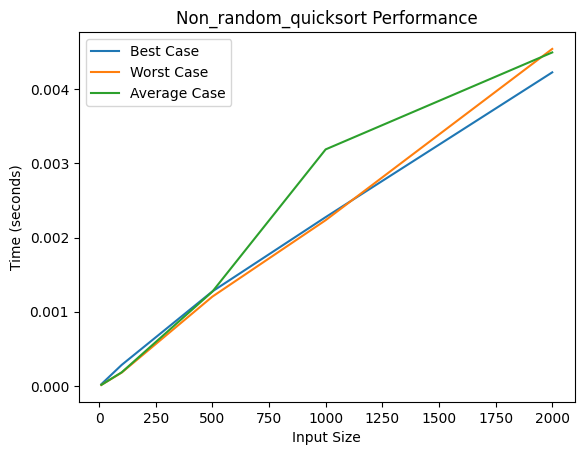

In [3]:
import time
import random
import matplotlib.pyplot as plt

def nonrandom_quicksort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    lesser = [x for x in array if x < pivot]
    equal = [x for x in array if x == pivot]
    greater = [x for x in array if x > pivot]
    return nonrandom_quicksort(lesser) + equal + nonrandom_quicksort(greater)

def generate_input(size, case='average'):
    if case == 'best':
        return list(range(1, size+1))
    elif case == 'worst':
        return list(range(size, 0, -1))
    else:
        return [random.randint(1, 1000) for _ in range(size)]

def measure_time(sort_function, input_generator, size, repetitions):
    total_time = 0
    for _ in range(repetitions):
        input_data = input_generator(size)
        start_time = time.time()
        sort_function(input_data)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / repetitions

def benchmark(sort_function, input_case, sizes, repetitions):
    times = []
    for size in sizes:
        avg_time = measure_time(sort_function, generate_input, size, repetitions)
        times.append(avg_time)
        print(f"Completed size {size}")
    return times

sizes = [10, 100, 500, 1000, 2000]
repetitions = 10

bestcase_times = benchmark(nonrandom_quicksort, 'best', sizes, repetitions)
worstcase_times = benchmark(nonrandom_quicksort, 'worst', sizes, repetitions)
averagecase_times = benchmark(nonrandom_quicksort, 'average', sizes, repetitions)

plt.plot(sizes, bestcase_times, label='Best Case')
plt.plot(sizes, worstcase_times, label='Worst Case')
plt.plot(sizes, averagecase_times, label='Average Case')

plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Non_random_quicksort Performance')
plt.legend()

plt.show()